In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import optimizers

Using TensorFlow backend.


In [0]:
import csv
df_train=pd.read_csv("trainset.data")
df_test=pd.read_csv("testset.dat")
df_dipep_train=pd.read_csv("dipep_train.csv")
df_dipep_test=pd.read_csv("dipep_test.csv")

In [0]:

#MLP implementation
# dipep_train_col=df_dipep_train.columns
# print(dipep_train_col)
# train_attri=[]
# for i in range(1,len(dipep_train_col)):
#     train_attri.append(dipep_train_col[i])
# print(len(train_attri))
# dipep_test_col=df_dipep_test.columns
# test_attri=[]
# for i in range(1,len(dipep_test_col)):
#     test_attri.append(dipep_test_col[i])
# print(len(test_attri))

# y=df_train.Label.values
# print(len(y))
# x=df_dipep_train[train_attri]
# print(len(x))
# xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2)

# from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
# clf.fit(xtrain, ytrain)
# MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,solver='lbfgs')
# test_p=df_dipep_test[test_attri]
# y_pred_mlp=clf.predict(test_p)
# print(y_pred_mlp)

# list1=df_test["ID"]
# output_list=[]
# test_c=["ID","Label"]
# output_list.append(test_c)
# for i in range(len(list1)):
#     t=[]
#     t.append(list1[i])
#     t.append(y_pred_mlp[i])
#     output_list.append(t)

# import csv
# with open('BDMH_mlp.csv', 'w', newline='') as file:
#     writer = csv.writer(file, delimiter=',')
#     writer.writerows(output_list)

In [28]:

X = df_dipep_train.iloc[:, 1:].values
print(X)
Y = df_train.iloc[:, 1].values
print(Y)

[[40.    0.    0.   ...  0.    0.    0.  ]
 [40.    0.    0.   ...  0.    0.    0.  ]
 [22.22  0.    0.   ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ... 14.29  0.    0.  ]
 [ 0.    0.    0.   ... 14.29  0.    0.  ]
 [ 0.    0.    0.   ...  0.    0.    9.09]]
[ 1 -1  1 ... -1 -1  1]


In [0]:
cls = Sequential()
cls.add(Dense(100, input_dim=400, activation='tanh'))
cls.add(Dense(100, activation='tanh'))
# cls.add(Dropout(0.5))
cls.add(Dense(1, activation='sigmoid'))

In [0]:
sgd=optimizers.SGD(lr=0.01)
cls.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['acc'])

In [49]:
cls.fit(X, Y, epochs=150, batch_size=100, verbose=2)

Epoch 1/150
 - 0s - loss: 0.3135 - acc: 0.0930
Epoch 2/150
 - 0s - loss: -4.8122e-01 - acc: 0.0159
Epoch 3/150
 - 0s - loss: -1.1039e+00 - acc: 0.0066
Epoch 4/150
 - 0s - loss: -1.8080e+00 - acc: 0.0048
Epoch 5/150
 - 0s - loss: -2.7155e+00 - acc: 0.0044
Epoch 6/150
 - 0s - loss: -3.9061e+00 - acc: 0.0062
Epoch 7/150
 - 0s - loss: -5.4544e+00 - acc: 0.0115
Epoch 8/150
 - 0s - loss: -7.4167e+00 - acc: 0.0194
Epoch 9/150
 - 0s - loss: -9.8350e+00 - acc: 0.0357
Epoch 10/150
 - 0s - loss: -1.2711e+01 - acc: 0.0502
Epoch 11/150
 - 0s - loss: -1.6142e+01 - acc: 0.0665
Epoch 12/150
 - 0s - loss: -2.0089e+01 - acc: 0.0899
Epoch 13/150
 - 0s - loss: -2.4581e+01 - acc: 0.1097
Epoch 14/150
 - 0s - loss: -2.9653e+01 - acc: 0.1229
Epoch 15/150
 - 0s - loss: -3.5238e+01 - acc: 0.1388
Epoch 16/150
 - 0s - loss: -4.1436e+01 - acc: 0.1586
Epoch 17/150
 - 0s - loss: -4.8060e+01 - acc: 0.1767
Epoch 18/150
 - 0s - loss: -5.5271e+01 - acc: 0.1952
Epoch 19/150
 - 0s - loss: -6.2610e+01 - acc: 0.2115
Epoch 2

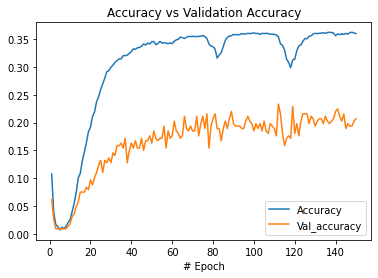

In [0]:
# hists=[]
# cls.fit(X, Y, epochs=150, batch_size=100, validation_split=0.1, verbose=2)
# hists.append(cls.history.history)

# import matplotlib.pyplot as plt
# acc = []
# val_acc = []
# for i in range(len(hists)):
#     acc += hists[i]["acc"]
#     val_acc += hists[i]["val_acc"]
# hist_df = pd.DataFrame({"# Epoch": [e for e in range(1,len(acc)+1)],"Accuracy": acc, "Val_accuracy": val_acc})
# hist_df.plot(x = "# Epoch", y = ["Accuracy","Val_accuracy"])
# plt.title("Accuracy vs Validation Accuracy")
# plt.show()

In [50]:
test_x=df_dipep_test.iloc[:,1:]

pred = cls.predict(test_x)
# pred = cls.predict_classes(test_x)
new_pred = [int(round(x[0])) for x in pred]
print(new_pred)

[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 

In [51]:

for n, i in enumerate(new_pred):
  if i==0:
    new_pred[n]=-1

print(new_pred)

[-1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1,

In [0]:
list1=df_test["ID"]
output_list=[]
test_c=["ID","Label"]
output_list.append(test_c)
for i in range(len(list1)):
    t=[]
    t.append(list1[i])
    t.append(new_pred[i])
    output_list.append(t)

In [0]:
print(output_list)

[['ID', 'Label'], [1001, -1], [1002, 1], [1003, -1], [1004, -1], [1005, -1], [1006, 1], [1007, -1], [1008, 1], [1009, -1], [1010, -1], [1011, -1], [1012, -1], [1013, 1], [1014, -1], [1015, -1], [1016, -1], [1017, -1], [1018, -1], [1019, 1], [1020, -1], [1021, -1], [1022, 1], [1023, -1], [1024, -1], [1025, -1], [1026, -1], [1027, -1], [1028, -1], [1029, -1], [1030, 1], [1031, 1], [1032, 1], [1033, -1], [1034, -1], [1035, -1], [1036, -1], [1037, -1], [1038, -1], [1039, 1], [1040, -1], [1041, -1], [1042, -1], [1043, 1], [1044, 1], [1045, -1], [1046, -1], [1047, 1], [1048, 1], [1049, -1], [1050, 1], [1051, -1], [1052, -1], [1053, -1], [1054, -1], [1055, -1], [1056, -1], [1057, -1], [1058, -1], [1059, -1], [1060, 1], [1061, 1], [1062, 1], [1063, -1], [1064, 1], [1065, -1], [1066, -1], [1067, -1], [1068, 1], [1069, -1], [1070, -1], [1071, -1], [1072, -1], [1073, -1], [1074, 1], [1075, -1], [1076, -1], [1077, -1], [1078, 1], [1079, -1], [1080, 1], [1081, -1], [1082, 1], [1083, -1], [1084, -1]

In [0]:
import csv
with open('final_output2.csv', 'w', newline='') as file:
    writer = csv.writer(file, delimiter=',')
    writer.writerows(output_list)